CSAI 801 Project: COVID-19 Outcome Prediction


Project Description
The data used in this project will help to identify whether a person is going to recover from
coronavirus symptoms or not based on some pre-defined standard symptoms. These symptoms are
based on guidelines given by the World Health Organization (WHO).
This dataset has daily level information on the number of affected cases, deaths and recovery from
2019 novel coronavirus. Please note that this is a time series data and so the number of cases on
any given day is the cumulative number.
The data is available from 22 Jan, 2020. Data is in “data.csv”.
The dataset contains 14 major variables that will be having an impact on whether someone has
recovered or not, the description of each variable are as follows,
1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear:
14. Result: death (1) or recovered (0)
It is required to design different classifiers to the predict the outcome (death/recovered) when a new
person is admitted to the hospital. The data is already cleaned and preprocessed.
You will have to divide the data into three partitions: training, validation, and testing. You need to
design the following classifiers:
1. K-Nearest Neighbors
2. Logistic Regression
3. Naïve Bayes
4. Decision Trees
5. Support Vector Machines
For each classifier, find the optimal hyperparameters.
You also need to compare the performance of all classifiers using different metrics such as the
precision, recall, F1-score, and ROC/AUC curves.
Prepare a document summarizing your findings and support your arguments using visualization.
You need to hand out/upload your code files (.ipynb) along with the project report.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#acuraccy scores
from sklearn.metrics import precision_score , recall_score , precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

#visiualize decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
c_dataset = pd.read_csv('/content/data.csv')


In [ ]:
c_dataset.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
X = c_dataset.iloc[:, 1:13].values

In [ ]:
Y = c_dataset.iloc[:, -1].values

In [ ]:
#before cleaning wrong values
c_dataset.tail()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
858,858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0
862,862,15,27,1,70.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
dups_color = c_dataset.pivot_table(columns=['gender'], aggfunc='size')
print(dups_color)

gender
0    302
1    389
2    172
dtype: int64


In [ ]:
features = ["location" ,"country","gender","age","vis_wuhan","from_wuhan","symptom1","symptom2","symptom3","symptom4",\
                "symptom5","symptom6","diff_sym_hos"]

In [ ]:
#cleaning wrong values
#removing data with gender==2
c_dataset = c_dataset.loc[c_dataset["gender"] < 2]
dups_color = c_dataset.pivot_table(columns=['gender'], aggfunc='size')
print(dups_color)

X_without_gender_2 = c_dataset.iloc[:, 1:14].values
y_without_gender_2 = c_dataset.iloc[:, -1].values

gender
0    302
1    389
dtype: int64


In [ ]:
#show data is clean now
c_dataset.tail()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
855,855,10,4,0,49.4,0,0,14,31,19,12,3,1,0,0
856,856,10,4,0,49.4,0,0,14,31,19,12,3,1,0,0
860,860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0
862,862,15,27,1,70.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
#divide the data into three partitions: training, validation, and testing.
#using a train test split to split data to train and test then using the cross validation


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_without_gender_2, y_without_gender_2, test_size=0.1,random_state = 42 ,shuffle = True)



In [ ]:
X_train

array([[ 56.,  18.,   1., ...,   3.,   1.,   2.],
       [137.,   8.,   1., ...,   3.,   1.,  13.],
       [120.,  12.,   1., ...,   3.,   1.,   0.],
       ...,
       [ 44.,  18.,   1., ...,   3.,   1.,   0.],
       [108.,  24.,   1., ...,   3.,   1.,   0.],
       [135.,   8.,   0., ...,   3.,   1.,   0.]])

In [ ]:
X_test

array([[108. ,  24. ,   1. ,  25. ,   0. ,   0. ,  19. ,  31. ,  19. ,
         12. ,   3. ,   1. ,   0. ],
       [ 10. ,   4. ,   0. ,  49.4,   0. ,   0. ,  14. ,  31. ,  19. ,
         12. ,   3. ,   1. ,   0. ],
       [ 78. ,  18. ,   0. ,  65. ,   0. ,   0. ,   6. ,  21. ,   6. ,
         12. ,   3. ,   1. ,   2. ],
       [ 78. ,  18. ,   0. ,  65. ,   0. ,   0. ,   6. ,  31. ,  19. ,
         12. ,   3. ,   1. ,   0. ],
       [ 49. ,  18. ,   1. ,  55. ,   0. ,   0. ,   6. ,  31. ,  19. ,
         12. ,   3. ,   1. ,   1. ],
       [117. ,  18. ,   1. ,  35. ,   0. ,   0. ,   6. ,  17. ,  19. ,
         12. ,   3. ,   1. ,   1. ],
       [108. ,  24. ,   1. ,  37. ,   0. ,   0. ,  14. ,  31. ,  19. ,
         12. ,   3. ,   1. ,   9. ],
       [ 44. ,  18. ,   0. ,  45. ,   1. ,   1. ,   6. ,   7. ,  19. ,
         12. ,   3. ,   1. ,   1. ],
       [ 44. ,  18. ,   1. ,  85. ,   0. ,   0. ,   2. ,  12. ,  19. ,
         12. ,   3. ,   1. ,   2. ],
       [117. ,  18. ,   1. ,

"""

important note:



to run any model we should start run the notebook from the first cell to this cell then run the desired model classifier







"""

In [ ]:
#1. K-Nearest Neighbors


1. K-Nearest Neighbors

training the knn model using grid search and validate against training and testing using cross validation

show each feature importance
drop non important features

using different metrics such as the precision, recall, F1-score, and ROC/AUC curves.


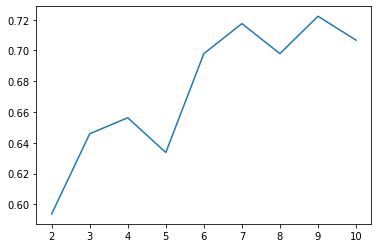

In [ ]:
#validate a KNeighborsClassifier over multiple folds of c_dataset
cross_v_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(KNeighborsClassifier() , X_train, y_train, cv = i,scoring='recall')
    cross_v_scores.append(scores.mean())

plt.plot(i_range, cross_v_scores)

In [ ]:
#best cv =9

Feature: 0, Score: 0.05507
Feature: 1, Score: 0.02995
Feature: 2, Score: 0.00129
Feature: 3, Score: 0.16586
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00161
Feature: 6, Score: -0.00032
Feature: 7, Score: 0.00805
Feature: 8, Score: -0.00354
Feature: 9, Score: -0.00161
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00193


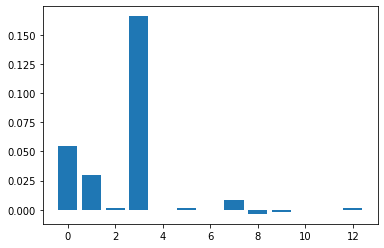

In [ ]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=14, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_train, y_train)
# perform permutation importance
results = permutation_importance(model, X_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
features = ["location" ,"country","gender","age","vis_wuhan","from_wuhan","symptom1","symptom2","symptom3","symptom4",\
                "symptom5","symptom6","diff_sym_hos"]

In [ ]:
#drop non important features
c_dataset= c_dataset.drop("gender", axis='columns')
c_dataset= c_dataset.drop("symptom3", axis='columns')
c_dataset= c_dataset.drop("vis_wuhan", axis='columns')
c_dataset= c_dataset.drop("symptom4", axis='columns')
c_dataset= c_dataset.drop("symptom5", axis='columns')
c_dataset= c_dataset.drop("symptom6", axis='columns')

In [ ]:
c_dataset

,Unnamed: 0,location,country,age,from_wuhan,symptom1,symptom2,diff_sym_hos,result
0,0,104,8,66.0,0,14,31,8,1
1,1,101,8,56.0,1,14,31,0,0
2,2,137,8,46.0,1,14,31,13,0
3,3,116,8,60.0,0,14,31,0,0
4,4,116,8,58.0,0,14,31,0,0
...,...,...,...,...,...,...,...,...,...
855,855,10,4,49.4,0,14,31,0,0
856,856,10,4,49.4,0,14,31,0,0
860,860,3,1,49.4,0,14,31,0,0
861,861,24,9,49.4,0,14,31,0,0


In [ ]:
X_knn = c_dataset.iloc[:, 1:7].values
y_knn = c_dataset.iloc[:, -1].values

In [ ]:
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_knn,y_knn, test_size=0.1,random_state = 42 ,shuffle = True)


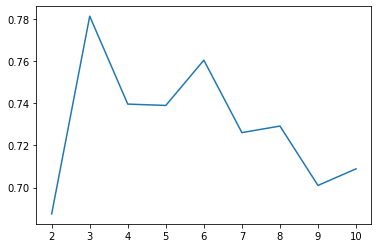

In [ ]:
cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(DecisionTreeClassifier() , X_train_k, y_train_k, cv = i,scoring='recall')
    cv_scores.append(scores.mean())

plt.plot(i_range, cv_scores)

In [ ]:
#tune K in Knn clf with range 1->30
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

param_grid = dict(
    {
     'n_neighbors' : list(range(1, 31)),
     'weights' : ['uniform','distance'],
     'metric' : ['minkowski','euclidean','manhattan']
    }
)

# reconstruct the model using the tunning parameter
grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=6, return_train_score=False,verbose=1)

# fitting the model for grid search
grid_KNN.fit(X_train_k, y_train_k)
y_pred_k = grid_KNN.predict(X_test_k)
print(grid_KNN.best_params_)

Fitting 6 folds for each of 180 candidates, totalling 1080 fits
{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}


In [ ]:
#compute confusion
con_matrix = confusion_matrix(y_test_k , y_pred_k)
print(con_matrix)

[[61  2]
 [ 0  7]]


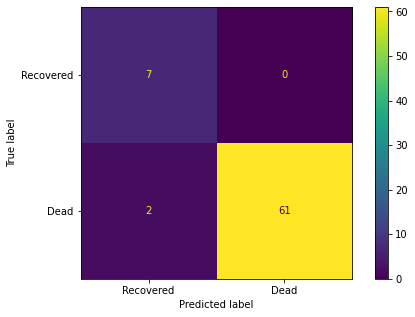

In [ ]:
#plot the confusion matrix
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def custom_confusion_matrix(y_true, y_pred_k, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred_k))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax)

custom_confusion_matrix(
  y_test_k, y_pred_k,
  display_labels=['Recovered','Dead']
)

In [ ]:
#using different metrics such as the precision, recall, F1-score, and ROC/AUC curves for knn
print("precision_score : ",precision_score(y_test_k , y_pred_k))
print("recall_score : " ,recall_score(y_test_k , y_pred_k))
print("roc_auc_score : ",roc_auc_score(y_test_k , y_pred_k))
print("f1_score : ",f1_score(y_test_k , y_pred_k))
print("accuracy_score : ",accuracy_score(y_test_k,y_pred_k))

KNN_score = ["KNN",accuracy_score(y_test,y_pred_k),precision_score(y_test_k , y_pred_k),recall_score(y_test_k , y_pred_k),\
            f1_score(y_test_k , y_pred_k),f1_score(y_test_k , y_pred_k)]

precision_score :  0.7777777777777778
recall_score :  1.0
roc_auc_score :  0.9841269841269842
f1_score :  0.8750000000000001
accuracy_score :  0.9714285714285714


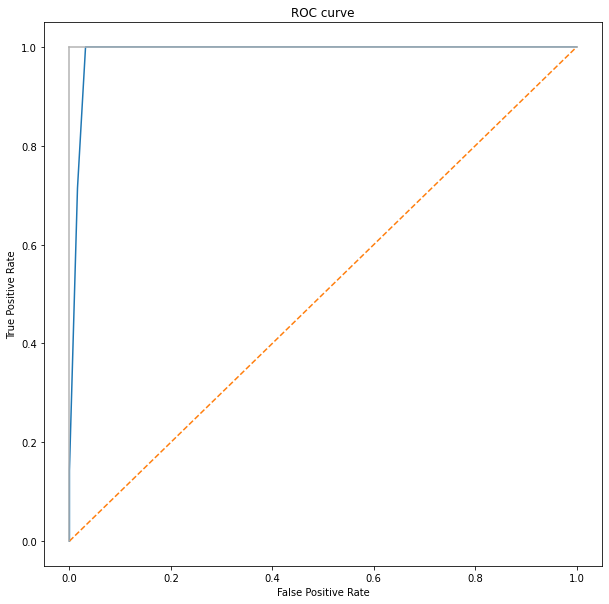

In [ ]:
# plot  ROC/AUC curves for knn
x_test_pred_prob = grid_KNN.predict_proba(X_test_k)[:,1]

fpr, tpr, thresh = roc_curve(y_test_k, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<AxesSubplot:>

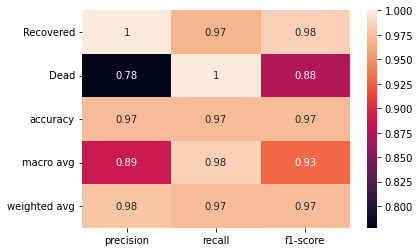

In [ ]:
#classification report for knn
labels = ['Recovered','Dead']
clf_report = classification_report(y_test_k,
                                       y_pred_k,
                                       target_names=labels,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


. Naïve Bayes


training the NB model using grid search and validate against training and testing using cross validation

show each feature importance drop non important features

using different metrics such as the precision, recall, F1-score, and ROC/AUC curves.


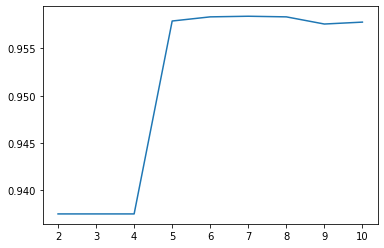

In [ ]:
cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(GaussianNB() , X_train, y_train, cv = i,scoring='recall')
    cv_scores.append(scores.mean())

plt.plot(i_range, cv_scores)

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

imps = permutation_importance(gaussian_nb, X_test, y_test)
print(imps.importances_mean)

[-0.01428571  0.01714286  0.         -0.01428571  0.01428571  0.00285714
  0.01428571  0.01142857  0.00285714  0.          0.          0.
  0.00571429]


In [ ]:
features = ["location" ,"country","gender","age","vis_wuhan","from_wuhan","symptom1","symptom2","symptom3","symptom4",\
                "symptom5","symptom6","diff_sym_hos"]

In [ ]:
#drop non important features
c_dataset= c_dataset.drop("gender", axis='columns')
c_dataset= c_dataset.drop("symptom3", axis='columns')
c_dataset= c_dataset.drop("vis_wuhan", axis='columns')
c_dataset= c_dataset.drop("symptom4", axis='columns')
c_dataset= c_dataset.drop("symptom5", axis='columns')
c_dataset= c_dataset.drop("symptom6", axis='columns')
# i don't drop any features for NB it doesn't work well with feature dropping


In [ ]:
c_dataset

,Unnamed: 0,location,country,age,from_wuhan,symptom1,symptom2,diff_sym_hos,result
0,0,104,8,66.0,0,14,31,8,1
1,1,101,8,56.0,1,14,31,0,0
2,2,137,8,46.0,1,14,31,13,0
3,3,116,8,60.0,0,14,31,0,0
4,4,116,8,58.0,0,14,31,0,0
...,...,...,...,...,...,...,...,...,...
855,855,10,4,49.4,0,14,31,0,0
856,856,10,4,49.4,0,14,31,0,0
860,860,3,1,49.4,0,14,31,0,0
861,861,24,9,49.4,0,14,31,0,0


In [ ]:
X_NB = c_dataset.iloc[:, 1:7].values
y_NB = c_dataset.iloc[:, -1].values

In [ ]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_NB, y_NB, test_size=0.1,random_state = 42 ,shuffle = True)


In [ ]:
param_grid = dict()

# reconstruct the model using the tuning parameters
grid_Nb = GridSearchCV(GaussianNB(), param_grid, cv=6,return_train_score=False,verbose=1)

# fitting the model for grid search
grid_Nb.fit(X_train_NB, y_train_NB)
y_pred_NB = grid_Nb.predict(X_test_NB)

Fitting 6 folds for each of 1 candidates, totalling 6 fits


In [ ]:
#compute the confusion matrix
con_matrix = confusion_matrix(y_test_NB, y_pred_NB)
print(con_matrix)

[[60  3]
 [ 0  7]]


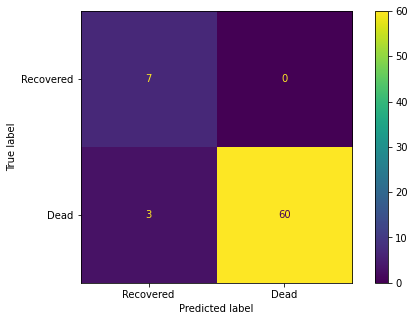

In [ ]:
#plot the confusion matrix
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def custom_confusion_matrix(y_test_NB, y_pred_NB, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_test_NB, y_pred_NB))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax)

custom_confusion_matrix(
  y_test_NB, y_pred_NB,
  display_labels=['Recovered','Dead']
)

In [ ]:
#compute precision, recall, F1-score, and ROC/AUC curves
print("precision_score : ",precision_score(y_test_NB , y_pred_NB))
print("recall_score : " ,recall_score(y_test_NB , y_pred_NB))
print("roc_auc_score : ",roc_auc_score(y_test_NB , y_pred_NB))
print("f1_score : ",f1_score(y_test_NB , y_pred_NB))
print("accuracy_score : ",accuracy_score(y_test_NB,y_pred_NB))

Naive_bayes_score = ["Naive bayes",accuracy_score(y_test_NB,y_pred_NB),precision_score(y_test_NB , y_pred_NB),\
                     recall_score(y_test_NB , y_pred_NB),f1_score(y_test , y_pred_NB),f1_score(y_test , y_pred_NB)]


precision_score :  0.7
recall_score :  1.0
roc_auc_score :  0.9761904761904762
f1_score :  0.8235294117647058
accuracy_score :  0.9571428571428572


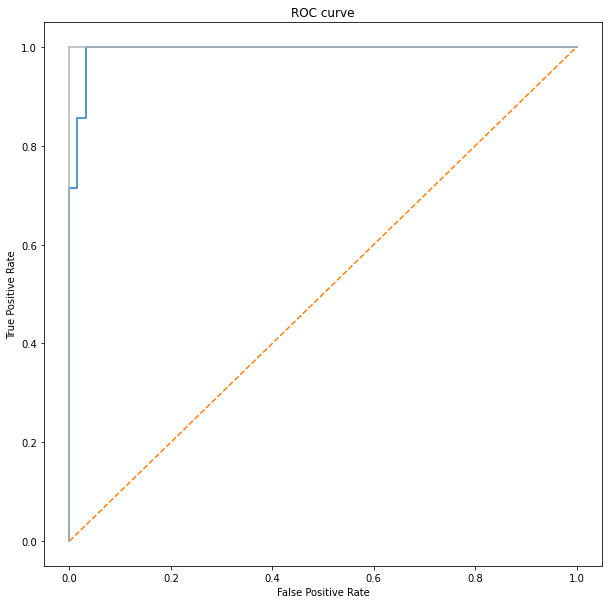

In [ ]:
#plot the roc curve
x_test_pred_prob = grid_Nb.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<AxesSubplot:>

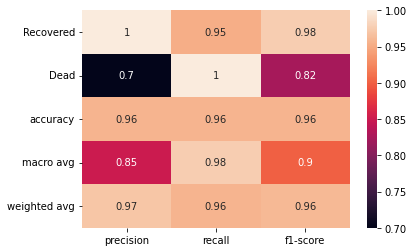

In [ ]:
#classification report
targets = ['Recovered','Dead']
clf_report = classification_report(y_test_NB,
                                       y_pred_NB,
                                       target_names=targets,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


3. Decision Trees

training the DT model using grid search and validate against training and testing using cross validation

show each feature importance drop non important features

using different metrics such as the precision, recall, F1-score, and ROC/AUC curves.


In [ ]:


#Decision Tree classifier




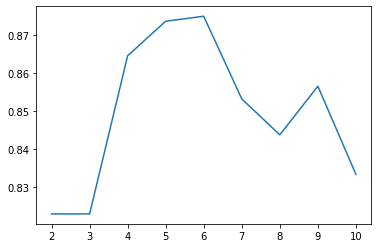

In [ ]:
cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(DecisionTreeClassifier() , X_train, y_train, cv = i,scoring='recall')
    cv_scores.append(scores.mean())

plt.plot(i_range, cv_scores)

Feature: 0, Score: 0.08639
Feature: 1, Score: 0.01318
Feature: 2, Score: 0.10435
Feature: 3, Score: 0.13795
Feature: 4, Score: 0.01079
Feature: 5, Score: 0.02852
Feature: 6, Score: 0.10185
Feature: 7, Score: 0.28429
Feature: 8, Score: 0.01563
Feature: 9, Score: 0.03737
Feature: 10, Score: 0.08763
Feature: 11, Score: 0.01695
Feature: 12, Score: 0.07512


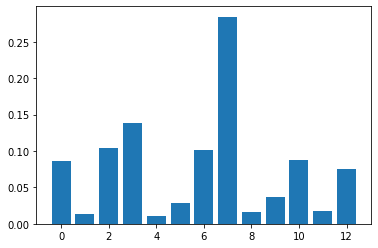

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X_train, y_train= make_classification(n_samples=775, n_features=13, n_informative=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
features = ["location" ,"country","gender","age","vis_wuhan","from_wuhan","symptom1","symptom2","symptom3","symptom4",\
                "symptom5","symptom6","diff_sym_hos"]

In [ ]:

#drop non important features
c_dataset = c_dataset.drop("country", axis='columns')
c_dataset = c_dataset.drop("vis_wuhan", axis='columns')
c_dataset = c_dataset.drop("symptom3", axis='columns')
c_dataset = c_dataset.drop("symptom6", axis='columns')





In [ ]:
c_dataset

,Unnamed: 0,location,gender,age,from_wuhan,symptom1,symptom2,symptom4,symptom5,diff_sym_hos,result
0,0,104,1,66.0,0,14,31,12,3,8,1
1,1,101,0,56.0,1,14,31,12,3,0,0
2,2,137,1,46.0,1,14,31,12,3,13,0
3,3,116,0,60.0,0,14,31,12,3,0,0
4,4,116,1,58.0,0,14,31,12,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
855,855,10,0,49.4,0,14,31,12,3,0,0
856,856,10,0,49.4,0,14,31,12,3,0,0
860,860,3,1,49.4,0,14,31,12,3,0,0
861,861,24,1,49.4,0,14,31,12,3,0,0


In [ ]:
X_dt = c_dataset.iloc[:, 1:9].values
y_dt = c_dataset.iloc[:, -1].values

In [ ]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.1,random_state = 42 ,shuffle = True)


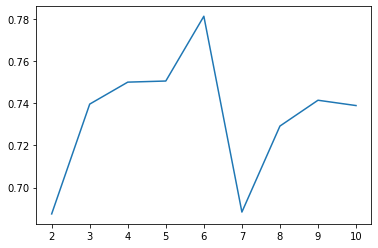

In [ ]:
cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(DecisionTreeClassifier() , X_train_dt, y_train_dt, cv = i,scoring='recall')
    cv_scores.append(scores.mean())

plt.plot(i_range, cv_scores)

In [ ]:
grid = dict(
    {
        'criterion' :['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2'],
        'ccp_alpha': [0.1, .01, .001],
        'max_depth' : [5, 6, 7, 8, 9]
    }
)

grid_Dec_Tree = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=grid, n_jobs=-1, cv=6 ,\
                             verbose=1,scoring='recall')

grid_Dec_Tree.fit(X_train_dt, y_train_dt)
y_pred = grid_Dec_Tree.predict(X_test_dt)

print(grid_Dec_Tree.best_params_)

Fitting 6 folds for each of 90 candidates, totalling 540 fits
{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


In [ ]:
#define classifier with best parameters
Dec_Tree_clf = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'gini', max_depth =8, max_features = 'log2',\
                                      random_state = 42)

Dec_Tree_clf.fit(X_train_dt, y_train_dt)
y_pred_dt = Dec_Tree_clf.predict(X_test_dt)

In [ ]:
#compute the confusion matrix
con_matrix = confusion_matrix(y_test_dt , y_pred_dt)
print(con_matrix)

[[58  5]
 [ 0  7]]


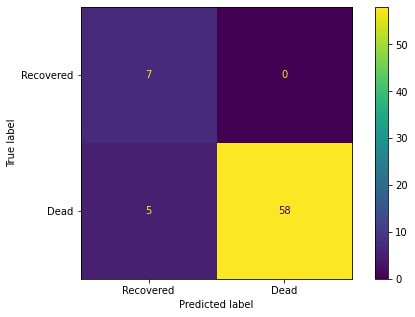

In [ ]:
#plot the confusion matrix
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def custom_confusion_matrix(y_true, y_pred_dt, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred_dt))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax)

custom_confusion_matrix(
  y_test_dt, y_pred_dt,
  display_labels=['Recovered','Dead']
)

In [ ]:
#compute precision, recall, F1-score, and ROC/AUC curves.
print("precision_score : ",precision_score(y_test_dt , y_pred_dt))
print("recall_score : " ,recall_score(y_test_dt , y_pred_dt))
print("roc_auc_score : ",roc_auc_score(y_test_dt , y_pred_dt))
print("f1_score : ",f1_score(y_test_dt , y_pred_dt))
print("accuracy_score : ",accuracy_score(y_test_dt,y_pred_dt))

Decision_Tree_score = ["Decision Tree",accuracy_score(y_test_dt,y_pred_dt),precision_score(y_test_dt , y_pred_dt),\
                       recall_score(y_test_dt , y_pred_dt),f1_score(y_test_dt , y_pred_dt),f1_score(y_test_dt , y_pred_dt)]

precision_score :  0.5833333333333334
recall_score :  1.0
roc_auc_score :  0.9603174603174603
f1_score :  0.7368421052631579
accuracy_score :  0.9285714285714286


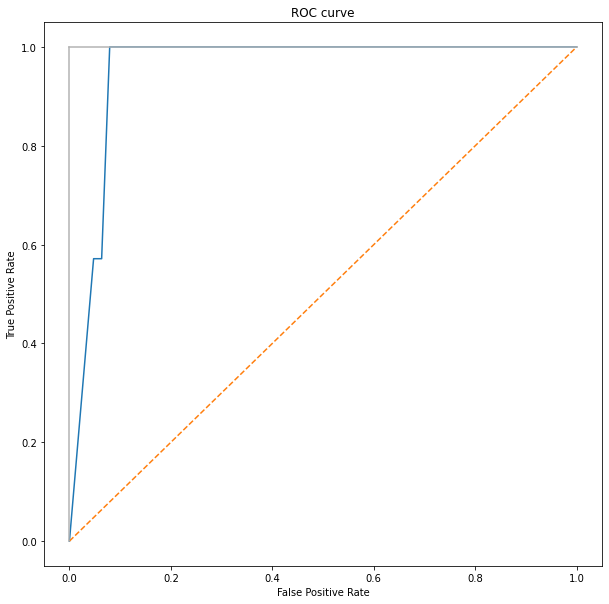

In [ ]:
#plot roc curve
x_test_pred_prob = Dec_Tree_clf.predict_proba(X_test_dt)[:,1]

fpr, tpr, thresh = roc_curve(y_test_dt, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<AxesSubplot:>

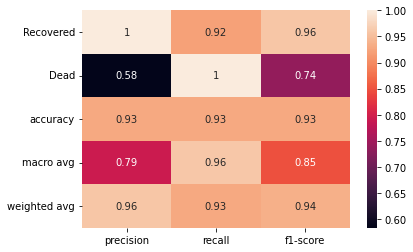

In [ ]:
#classification report
targets = ['Recovered','Dead']
clf_report = classification_report(y_test,
                                       y_pred_dt,
                                       target_names=targets,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

4. Logistic Regression

training the Logreg model using grid search and validate against training and testing using cross validation

show each feature importance percentage

using different metrics such as the precision, recall, F1-score, and ROC/AUC curves.


In [ ]:


#2. Logistic Regression Classifier




In [ ]:
#feature scaling using a standarization("wherewhere the mean of the c_dataset is 0 and the standard deviation is 1")
sc = StandardScaler()
X_train_LR= sc.fit_transform(X_train)
X_test_LR = sc.transform(X_test)

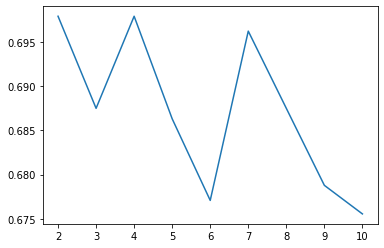

In [ ]:
#validate a logestic over multiple folds of c_dataset
cross_v_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(LogisticRegression(), X_train_LR, y_train, cv = i,scoring='recall')
    cross_v_scores.append(scores.mean())

plt.plot(i_range, cross_v_scores)

Feature: 0, Score: -0.14195
Feature: 1, Score: 0.02278
Feature: 2, Score: -0.42400
Feature: 3, Score: -0.73924
Feature: 4, Score: 0.07950
Feature: 5, Score: -0.29456
Feature: 6, Score: 0.50886
Feature: 7, Score: 0.20610
Feature: 8, Score: 0.08090
Feature: 9, Score: 0.06235
Feature: 10, Score: 0.02745
Feature: 11, Score: 0.11332
Feature: 12, Score: -0.26028


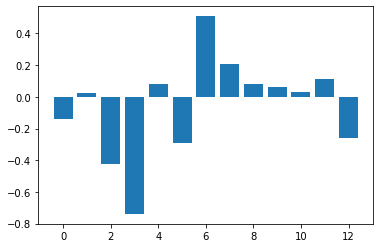

In [ ]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X_train_LR, y_train= make_classification(n_samples=775, n_features=13, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train_LR, y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
features = ["location" ,"country","gender","age","vis_wuhan","from_wuhan","symptom1","symptom2","symptom3","symptom4",\
                "symptom5","symptom6","diff_sym_hos"]

In [ ]:
"""
#drop non important features
c_dataset= c_dataset.drop("location", axis='columns')
c_dataset= c_dataset.drop("gender", axis='columns')
c_dataset= c_dataset.drop("from_wuhan", axis='columns')
c_dataset= c_dataset.drop("diff_sym_hos", axis='columns')
c_dataset= c_dataset.drop("age", axis='columns')"""
"""


# when i apply drop to some non important feature the logreg model doesn't work well so i cancelled the cell



In [ ]:
c_dataset

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,855,10,4,0,49.4,0,0,14,31,19,12,3,1,0,0
856,856,10,4,0,49.4,0,0,14,31,19,12,3,1,0,0
860,860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [ ]:
X_LR = c_dataset.iloc[:, 1:13].values
y_LR = c_dataset.iloc[:, -1].values

In [ ]:
X_train_LR1, X_test_LR1, y_train_LR1, y_test_LR1 = train_test_split(X_LR, y_LR, test_size=0.1,random_state = 42 ,shuffle = True)


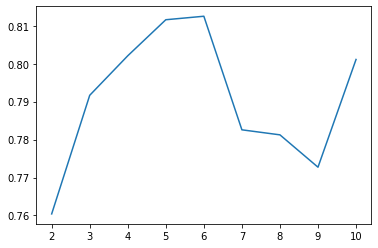

In [ ]:
cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(DecisionTreeClassifier() , X_train_LR1, y_train_LR1, cv = i,scoring='recall')
    cv_scores.append(scores.mean())

plt.plot(i_range, cv_scores)

In [ ]:


#grid search for logestic regression





In [ ]:
from sklearn.linear_model import LogisticRegression

# define grid search
grid = dict(
    {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
)

grid_LR = GridSearchCV(LogisticRegression(), param_grid=grid, n_jobs=-1, cv=6,error_score=0,verbose=1)
grid_LR.fit(X_train_LR1, y_train_LR1)


Fitting 6 folds for each of 1600 candidates, totalling 9600 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4320 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=6, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [ ]:
y_pred_LR1= grid_LR.predict(X_test_LR1)


In [ ]:
print(grid_LR.best_params_)

{'C': 4.281332398719396, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
con_matrix = confusion_matrix(y_test_LR1 ,y_pred_LR1)
print(con_matrix)

[[60  3]
 [ 0  7]]


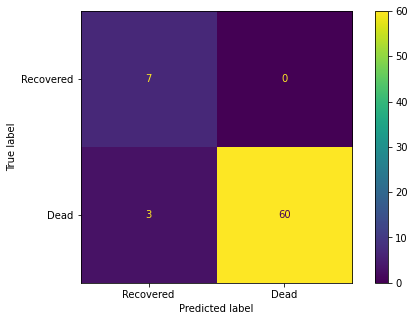

In [ ]:
#plot the confusion matrix
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def custom_confusion_matrix(y_true, y_pred_LR1, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred_LR1))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax)

custom_confusion_matrix(
  y_test_LR1, y_pred_LR1,
  display_labels=['Recovered','Dead']
)

In [ ]:
#using different metrics such as the precision, recall, F1-score, and ROC/AUC curves for logestic regression
print("precision_score : ",precision_score(y_test_LR1 , y_pred_LR1))
print("recall_score : " ,recall_score(y_test_LR1 , y_pred_LR1))
print("roc_auc_score : ",roc_auc_score(y_test_LR1  , y_pred_LR1))
print("f1_score : ",f1_score(y_test_LR1 , y_pred_LR1))
print("accuracy_score : ",accuracy_score(y_test_LR1,y_pred_LR1))

Logistic_regression_score = ["Logistic regression",accuracy_score(y_test_LR1,y_pred_LR1),precision_score(y_test_LR1 , y_pred_LR1),\
                       recall_score(y_test_LR1 , y_pred_LR1),f1_score(y_test_LR1 , y_pred_LR1),f1_score(y_test_LR1 , y_pred_LR1)]

precision_score :  0.7
recall_score :  1.0
roc_auc_score :  0.9761904761904762
f1_score :  0.8235294117647058
accuracy_score :  0.9571428571428572


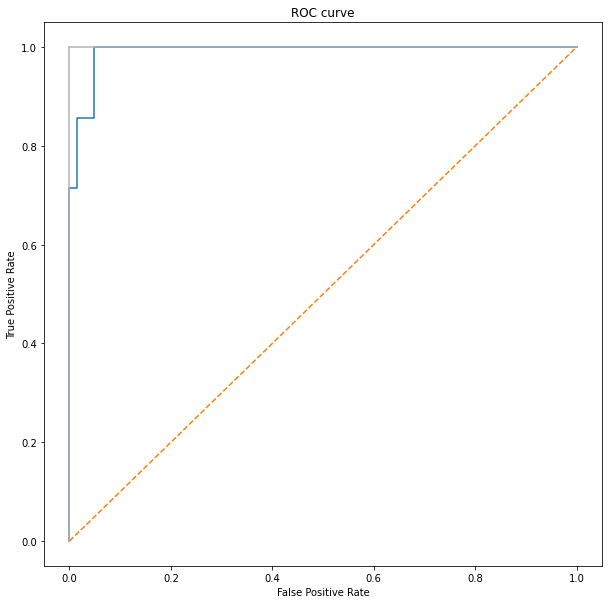

In [ ]:
#plot and ROC/AUC curves for logestic regression
x_test_pred_prob = grid_LR.predict_proba(X_test_LR1)[:,1]
fpr, tpr, thresh = roc_curve(y_test_LR1, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<AxesSubplot:>

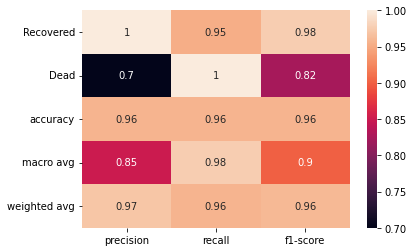

In [ ]:
#classification report for logetic regression
targets = ['Recovered','Dead']
clf_report = classification_report(y_test_LR1,
                                       y_pred_LR1,
                                       target_names=targets,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

#5. Support Vector Machines

training the svm model using grid search and validate against training and testing using cross validation

 using different metrics such as the
precision, recall, F1-score, and ROC/AUC curves.



In [ ]:
from sklearn.svm import SVC


when i apply drop to some non importanr feature the svm model doesn't work


well so i cancelled dropping some features cause it causes the accuracy to be low**



In [ ]:
#GrideSearchCV to find the optimal hyperparameters by fit the model with difrrent hyperparameters and chose the best one with high accuracy
get_grid_para = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf'], 'probability':[True,False]}
grid_result = GridSearchCV(SVC(random_state=3), get_grid_para, refit = True, verbose = 3, cv=8, n_jobs= -1, scoring = 'accuracy')
grid_result.fit(X_train, y_train)

Fitting 8 folds for each of 80 candidates, totalling 640 fits


GridSearchCV(cv=8, estimator=SVC(random_state=3), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf'],
                         'probability': [True, False]},
             scoring='accuracy', verbose=3)

In [ ]:
print(grid_result.best_params_, '  ' , grid_result.best_estimator_ , ' The Best Score : ' , grid_result.best_score_)


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}    SVC(C=100, gamma=0.001, probability=True, random_state=3)  The Best Score :  0.9517357642357642


In [ ]:
#Train the model with optimal hyperparameters
SVM_model = SVC( kernel = 'rbf', C=10 , gamma=0.1 , random_state = 0 , probability=True)
SVM_model.fit(X_train, y_train)

SVC(C=10, gamma=0.1, probability=True, random_state=0)

In [ ]:
SVC(C=10, gamma=0.1, probability=True, random_state=0)


SVC(C=10, gamma=0.1, probability=True, random_state=0)

In [ ]:
#Test the accuracy of model on training set
print('SVM_model Train Score is : ' , SVM_model.score(X_train, y_train))

SVM_model Train Score is :  1.0


In [ ]:
yPred = SVM_model.predict(X_test)


In [ ]:
con_matrix = confusion_matrix(y_test, yPred)
print(con_matrix)

[[63  0]
 [ 6  1]]


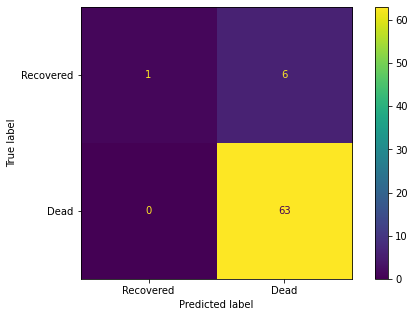

In [ ]:
#plot the confusion matrix
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

def custom_confusion_matrix(y_test, yPred , display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_test, yPred ))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax)

custom_confusion_matrix(
  y_test, yPred ,
  display_labels=['Recovered','Dead']
)

In [ ]:
#drop non important features

c_dataset= c_dataset.drop("from_wuhan", axis='columns')
c_dataset= c_dataset.drop("diff_sym_hos", axis='columns')
c_dataset= c_dataset.drop("symptom5", axis='columns')
c_dataset= c_dataset.drop("symptom6", axis='columns')
c_dataset= c_dataset.drop("symptom4", axis='columns')
c_dataset= c_dataset.drop("country", axis='columns')



In [ ]:
print("precision_score : ",precision_score(y_test ,yPred))
print("recall_score : " ,recall_score(y_test,yPred))
print("roc_auc_score : ",roc_auc_score(y_test,yPred))
print("f1_score : ",f1_score(y_test,yPred))
print("accuracy_score : ",accuracy_score(y_test,yPred))

SVM_score = ["SVM",accuracy_score(y_test,yPred),precision_score(y_test,yPred),\
                       recall_score(y_test,yPred),f1_score(y_test,yPred),f1_score(y_test,yPred)]

precision_score :  1.0
recall_score :  0.14285714285714285
roc_auc_score :  0.5714285714285714
f1_score :  0.25
accuracy_score :  0.9142857142857143


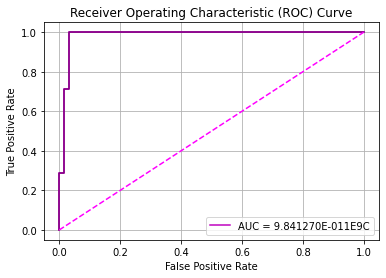

In [ ]:
#Calculating Area Under the Curve with predict probapility
fpr, tpr, thresholds = roc_curve(y_test, SVM_model.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, SVM_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'm', label = 'AUC = %7E1E9C' % roc_auc)
plt.plot(fpr, tpr, color='purple', label='')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

<AxesSubplot:>

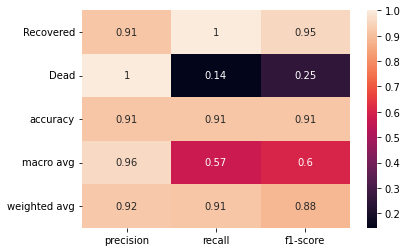

In [ ]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test,
                                       yPred,
                                       target_names=targets,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

compare the performance of all classifiers using different metrics such as the
precision, recall, F1-score, and ROC/AUC curves.



In [ ]:
column_names = ["Classifier", "Accuracy", "precision","Recall","F1 score","ROC/AUC"]

Data = [KNN_score , Naive_bayes_score , Decision_Tree_score , Logistic_regression_score , SVM_score]

comparision_df = pd.DataFrame(Data , columns = column_names)

comparision_df

,Classifier,Accuracy,precision,Recall,F1 score,ROC/AUC
0,KNN,0.971429,0.777778,1.000000,0.875000,0.875000
1,Naive bayes,0.957143,0.700000,1.000000,0.823529,0.823529
2,Decision Tree,0.928571,0.583333,1.000000,0.736842,0.736842
3,Logistic regression,0.957143,0.700000,1.000000,0.823529,0.823529
4,SVM,0.914286,1.000000,0.142857,0.250000,0.250000
